In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df=pd.merge(ride_df,city_df,how='left',left_on='city',right_on='city')
# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

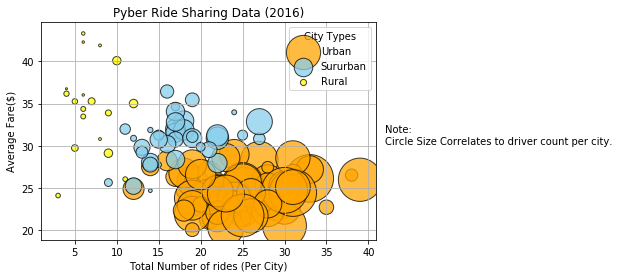

In [2]:
# Obtain the x and y coordinates for each of the three city types
#Urban
ride_df=merge_df.loc[merge_df['type']=='Urban'].groupby('city')
plt.scatter(ride_df['ride_id'].count(),ride_df['fare'].mean(),s=ride_df['driver_count'].sum(),
            alpha=.75,edgecolors='black',color='orange',label='Urban')
#Suburban
ride_df=merge_df.loc[merge_df['type']=='Suburban'].groupby('city')
plt.scatter(ride_df['ride_id'].count(),ride_df['fare'].mean(),s=ride_df['driver_count'].sum(),
            alpha=.75,edgecolors='black',color='skyblue',label='Sururban')
#Rural
ride_df=merge_df.loc[merge_df['type']=='Rural'].groupby('city')
plt.scatter(ride_df['ride_id'].count(),ride_df['fare'].mean(),s=ride_df['driver_count'].sum(),
            alpha=.75,edgecolors='black',color='yellow',label='Rural')

# Incorporate the other graph properties
plt.xlabel('Total Number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
plt.legend(title='City Types')
plt.grid()
# Incorporate a text label regarding circle size
plt.text(42,30,'Note:\nCircle Size Correlates to driver count per city.',
         verticalalignment='bottom',horizontalalignment='left')
#urban_df.head()
# Save Figure
plt.savefig('../Images/Pyber_Scatter.png')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

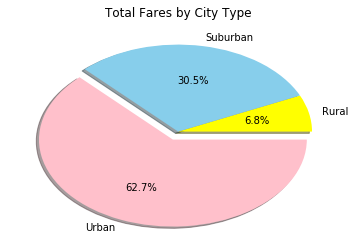

In [4]:
# Calculate Type Percents
type_df=merge_df.groupby('type')
type_perc=type_df['fare'].sum()
type_perc=type_perc.divide(type_perc.sum()/100)
# Build Pie Chart
plt.pie(type_perc,autopct='%1.1f%%',labels=['Rural','Suburban','Urban'],explode=[0,0,0.1],
        colors=['yellow','skyblue','pink'],shadow=True)
plt.title('Total Fares by City Type')
# Save Figure
plt.savefig('../Images/totalfare_type.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

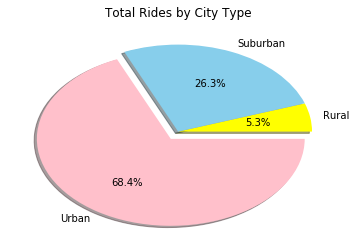

In [6]:
# Calculate Ride Percents
type_df=merge_df.groupby('type')
type_perc=type_df['ride_id'].count()
type_perc=type_perc.divide(type_perc.sum()/100)
#Build pie Chart
plt.pie(type_perc,autopct='%1.1f%%',labels=['Rural','Suburban','Urban'],explode=[0,0,0.1],
        colors=['yellow','skyblue','pink'],shadow=True)
plt.title('Total Rides by City Type')
# Save Figure
plt.savefig('../Images/totalrides_type.png')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

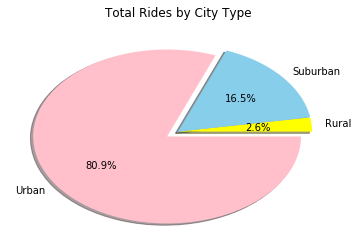

In [8]:
# Calculate Driver Percents
#use only city data or use unique city for driver count
type_df=city_df.groupby('type')
type_perc=type_df['driver_count'].sum()
type_perc=type_perc.divide(type_perc.sum()/100)
#Build pie Chart
plt.pie(type_perc,autopct='%1.1f%%',labels=['Rural','Suburban','Urban'],explode=[0,0,0.1],
        colors=['yellow','skyblue','pink'],shadow=True)
plt.title('Total Rides by City Type')
# Save Figure
plt.savefig('../Images/totaldrivers_type.png')

In [9]:
# Show Figure
plt.show()